In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

In [2]:
df = pd.read_csv('Combined_News_DJIA.csv')
df.shape

(1989, 27)

In [5]:
#fix nans
documents = []
for row in range(df.shape[0]):
    for col in range(2,27):
        if type(df.iloc[row,col])!=str:
            print(df.iloc[row,col])
            documents.append(" ")
        else:
            documents.append(df.iloc[row,col])
len(documents)

nan
nan
nan
nan
nan
nan
nan


49725

In [6]:
news_df = pd.DataFrame({'document':documents})

# removing everything except alphabets`
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")


# removing short words
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
news_df['headline_text'] = news_df['clean_doc'].apply(lambda x: x.lower())
news_df["index"] = [i for i in range(len(documents))]
del news_df['document']
del news_df['clean_doc']
documents = news_df

In [7]:
documents[0:5]

,headline_text,index
0,georgia downs russian warplanes countries move brink,0
1,breaking musharraf impeached,1
2,russia today columns troops roll into south ossetia footage from fighting youtube,2
3,russian tanks moving towards capital south ossetia which reportedly been completely destroyed georgian artillery fire,3
4,afghan children raped with impunity official says this sick three year raped they nothing,4


In [8]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import PorterStemmer
#from nltk.stem.porter import stemmer
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

C:\Users\dkout\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dkout\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
def lemmatize_stemming(text):
    return PorterStemmer().stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [10]:
doc_sample = documents[documents['index'] == 4310].values[0][0]
print(doc_sample)
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

gets fiji daily
original document: 
['gets', 'fiji', 'daily']


 tokenized and lemmatized document: 
['get', 'fiji', 'daili']


In [21]:
documents[documents['index']==1].values[0][0]

'breaking musharraf impeached'

In [28]:
processed_docs = documents['headline_text'].map(preprocess)
processed_docs[:10]

0                                                  [georgia, down, russian, warplan, countri, brink]
1                                                                        [break, musharraf, impeach]
2                        [russia, today, column, troop, roll, south, ossetia, footag, fight, youtub]
3    [russian, tank, move, capit, south, ossetia, reportedli, complet, destroy, georgian, artilleri]
4                                       [afghan, children, rap, impun, offici, say, sick, year, rap]
5                       [russian, tank, enter, south, ossetia, whilst, georgia, shoot, russian, jet]
6                                    [break, georgia, invad, south, ossetia, russia, warn, interven]
7                [enemi, combat, trial, sham, salim, haman, sentenc, year, keep, longer, feel, like]
8                      [georgian, troop, retreat, osettain, capit, presum, leav, peopl, kill, video]
9                                                                            [prep, georgia

In [29]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 brink
1 countri
2 down
3 georgia
4 russian
5 warplan
6 break
7 impeach
8 musharraf
9 column
10 fight


In [30]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [31]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(85, 1), (1549, 1), (3266, 1)]

In [32]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 85 ("get") appears 1 time.
Word 1549 ("daili") appears 1 time.
Word 3266 ("fiji") appears 1 time.


In [33]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.47914147024532405),
 (1, 0.23501419159527553),
 (2, 0.48437179372055855),
 (3, 0.4186251459395654),
 (4, 0.26081310242956),
 (5, 0.4871398767048768)]


In [34]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [35]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.025*"isi" + 0.016*"world" + 0.010*"water" + 0.009*"india" + 0.009*"million" + 0.008*"report" + 0.008*"scientist" + 0.008*"chines" + 0.007*"studi" + 0.006*"israel"
Topic: 1 
Words: 0.016*"islam" + 0.015*"right" + 0.013*"court" + 0.012*"say" + 0.012*"state" + 0.011*"kill" + 0.011*"shoot" + 0.010*"polic" + 0.009*"human" + 0.009*"muslim"
Topic: 2 
Words: 0.012*"japan" + 0.011*"year" + 0.011*"power" + 0.010*"protest" + 0.009*"climat" + 0.009*"energi" + 0.008*"billion" + 0.007*"chang" + 0.007*"world" + 0.007*"million"
Topic: 3 
Words: 0.021*"kill" + 0.019*"drug" + 0.014*"say" + 0.011*"mexico" + 0.009*"presid" + 0.009*"death" + 0.008*"govern" + 0.008*"peopl" + 0.008*"legal" + 0.007*"canadian"
Topic: 4 
Words: 0.009*"say" + 0.008*"abus" + 0.008*"pope" + 0.008*"internet" + 0.008*"year" + 0.007*"child" + 0.007*"corrupt" + 0.007*"world" + 0.007*"saudi" + 0.006*"compani"
Topic: 5 
Words: 0.018*"attack" + 0.014*"say" + 0.011*"militari" + 0.009*"forc" + 0.009*"north" + 0.008*"syri

In [ ]:
#number of documents
lda_model[bow_corpus[354]]
processed_docs.shape

In [83]:
#Now let's average out those scores over the surrounding 1000 articles scores to see how average scores change over time
n = processed_docs.shape[0]
averages = []
i=0
start = 2008
end = 2016
dates = []
while(i<n):
    array = np.zeros((10,1))
    k=0
    pred = lda_model[bow_corpus[i]]
    for j in range(10):
        if j in [tup[0] for tup in pred]:
            array[j,:] = pred[k][1]
            k+=1
            
    running_sum = array
    i+=1
    count = 0
    while (i)%500 != 0 and i<n:
        #print(i)
        array = np.zeros((10,1))
        k=0
        pred = lda_model[bow_corpus[i]]
        for j in range(10):
            if j in [tup[0] for tup in pred]:
                try:
                    array[j,:] = pred[k][1]
                    k+=1
                except:
                    print(i,array,j,k,pred)

        running_sum = running_sum + array
        i+=1
        count+=1
    averages.append(running_sum/count)
    dates.append(start + (end-start)*i/n)

In [84]:
averages = np.hstack(average for average in averages)
averages.shape

(10, 100)

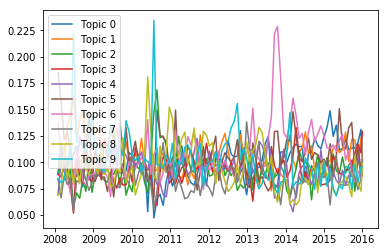

In [85]:
import matplotlib.pyplot as plt
plt.plot(dates,averages.T)
plt.legend(["Topic "+str(i) for i in range(averages.shape[0])])

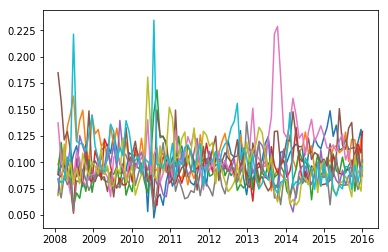

In [86]:
import matplotlib.pyplot as plt
plt.plot(dates,averages.T)